# creating input files for magphys

* 2022-June-03 Implemented galactic extinction correction

# CREATING MAGPHYS INPUT FROM JOHN'S FILES

* john sent photometry file

```
I'm not certain who's taking the lead on the SED modeling, but can you
take the attached catalog for a test drive? There are three HDUs:

ELLIPSE - elliptical surface brightness profiles and aperture photometry
TRACTOR - Tractor catalog
PARENT - input / parent catalog

The data model for the ELLIPSE catalog should be (mostly?)
self-documenting, but you should try out the aperture photometry in
  FLUX_SB[23,24,25,26]_[FUV,NUV,G,R,Z,W1,W2,W3,W4]
  FLUX_IVAR_SB[23,24,25,26]_[FUV,NUV,G,R,Z,W1,W2,W3,W4]

and also (for fun) the total / integrated photometry based on fitting
the curve of growth in
  COG_MTOT_[FUV,NUV,G,R,Z,W1,W2,W3,W4]

but I do not have uncertainties for those (model-based) magnitudes just yet.

The fluxes and inverse variances, BTW, are in nanomaggies, and
negative fluxes should be fine to use since I'm also measuring the
inverse variance in the same aperture.

Let me know how this goes!

```

* I downloaded the file into ~/research/Virgo/legacy-phot/virgofilaments-legacyphot.fits

* magphys wants the fluxes in Jy, so I will need to convert from nanomaggies to Jy

  * star with flux of 1 maggie has AB mag of zero and flux density of 3631 Jy.
  https://www.sdss.org/dr15/help/glossary#M
  
```
nanomaggie
    A linear unit of flux density equal to 10-9 maggies. A star of brightness 1 nanomaggie has a magnitude of 22.5 in any band, or a flux density of 3.631 × 10-6 Jansky.
```

  * so I can multiply John's fluxes by 3631e-6 to convert to Jy
  
* input needed by magphys


In [49]:
from astropy.io import fits
from astropy.table import Table
import os
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import scoreatpercentile

In [4]:
os.chdir('/home/rfinn/research/Virgo/legacy-phot/')

photfile = '/home/rfinn/research/Virgo/legacy-phot/virgofilaments-legacyphot.fits'

# updating to use v2 catalog
photfile = '/home/rfinn/research/Virgo/legacy-phot/virgofilaments-v2-legacyphot.fits'
mef_table = fits.open(photfile)

# changing to extension 2 for file that john sent on Aug 14, 2021
#ephot = Table.read(photfile,1) # first hdu is the elliptical photometry
ephot = Table(mef_table['ELLIPSE'].data) # first hdu is the elliptical photometry
pphot = Table(mef_table['PARENT'].data) # this one has RA and DEC, which we need to separate N and S
tphot = Table(mef_table['TRACTOR'].data) # this one has RA and DEC, which we need to separate N and S
mef_table.close()

In [5]:
pphot

VFID,VF_ID,RA,DEC,RA_ORIG,DEC_ORIG,RADIUS,GALAXY,SGA_ID,PGC,PA_INIT,BA_INIT,DIAM_INIT,MAG_INIT,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER
str8,int64,float64,float64,float64,float64,float32,str28,int64,int32,float32,float32,float32,float32,int32,str33,int16,bool,float64,float64,float32
VFID0000,0,185.86977318925136,74.95232228954907,185.86877249999998,74.9522485,40.0,NGC4363,521041,40233,11.151623,0.8043014,1.145519,14.544,0,NGC4363,1,True,185.86977318925136,74.95232228954907,1.145519
VFID0001,1,182.20821915029524,74.90419783671959,182.208,74.9042778,49.6731,NGC4133,561708,38578,136.89676,0.6498312,2.8770778,13.009,1,NGC4133,1,True,182.20821915029524,74.90419783671959,2.8770778
VFID0002,2,145.94484653625753,74.85974192967987,145.944663,74.8595778,62.3909,NGC2977,703485,27845,145.37277,0.47907138,2.1300297,13.274,2,NGC2977,1,True,145.94484653625753,74.85974192967987,2.1300297
VFID0003,3,185.5726498136609,74.83840796233775,185.5730835,74.8383889,40.0,PGC040048,627180,40048,159.05542,0.85205746,1.4007422,15.027,3,PGC040048,1,True,185.5726498136609,74.83840796233775,1.4007422
VFID0004,4,182.82846994356441,74.8085414171544,182.82775049999998,74.8082222,40.937492,UGC07189,1302185,38805,10.835036,0.84608626,2.2152128,14.724,4,UGC07189,1,True,182.82846994356441,74.8085414171544,2.2152128
VFID0005,5,173.13459386620133,74.62749956456204,173.1341835,74.6275401,48.654305,NGC3752,1024584,35608,143.57559,0.44437957,3.6023273,13.611,5,NGC3752,1,True,173.13459386620133,74.62749956456204,3.6023273
VFID0006,6,121.91285938434163,74.58461894746196,121.912404,74.5846308,40.0,UGC04202,712369,22815,173.2446,0.18366969,1.7960624,16.0,6,UGC04202,1,True,121.91285938434163,74.58461894746196,1.7960624
VFID0007,7,118.23630222550408,74.5766734650277,118.2363,74.576533,40.0,PGC022064,156922,22064,1.352254,0.3100875,1.3085954,16.32,7,PGC022064,1,True,118.23630222550408,74.5766734650277,1.3085954
VFID0008,8,274.9441915079275,74.5689374919823,274.943166,74.5683889,99.56834,NGC6643,382830,61742,36.83784,0.5052335,4.9255514,11.757,8,NGC6643,1,True,274.9441915079275,74.5689374919823,4.9255514


In [6]:
ephot

VF_ID,GALAXY,X0_MOMENT,Y0_MOMENT,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,PA_MOMENT,BA_MOMENT,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,SMA_IVAR_SB22,SMA_IVAR_SB22.5,SMA_IVAR_SB23,SMA_IVAR_SB23.5,SMA_IVAR_SB24,SMA_IVAR_SB24.5,SMA_IVAR_SB25,SMA_IVAR_SB25.5,SMA_IVAR_SB26,FLUX_SB22_G,FLUX_SB22.5_G,FLUX_SB23_G,FLUX_SB23.5_G,FLUX_SB24_G,FLUX_SB24.5_G,FLUX_SB25_G,FLUX_SB25.5_G,FLUX_SB26_G,FLUX_IVAR_SB22_G,FLUX_IVAR_SB22.5_G,FLUX_IVAR_SB23_G,FLUX_IVAR_SB23.5_G,FLUX_IVAR_SB24_G,FLUX_IVAR_SB24.5_G,FLUX_IVAR_SB25_G,FLUX_IVAR_SB25.5_G,FLUX_IVAR_SB26_G,FLUX_SB22_R,FLUX_SB22.5_R,FLUX_SB23_R,FLUX_SB23.5_R,FLUX_SB24_R,FLUX_SB24.5_R,FLUX_SB25_R,FLUX_SB25.5_R,FLUX_SB26_R,FLUX_IVAR_SB22_R,FLUX_IVAR_SB22.5_R,FLUX_IVAR_SB23_R,FLUX_IVAR_SB23.5_R,FLUX_IVAR_SB24_R,FLUX_IVAR_SB24.5_R,FLUX_IVAR_SB25_R,FLUX_IVAR_SB25.5_R,FLUX_IVAR_SB26_R,FLUX_SB22_Z,FLUX_SB22.5_Z,FLUX_SB23_Z,FLUX_SB23.5_Z,FLUX_SB24_Z,FLUX_SB24.5_Z,FLUX_SB25_Z,FLUX_SB25.5_Z,FLUX_SB26_Z,FLUX_IVAR_SB22_Z,FLUX_IVAR_SB22.5_Z,FLUX_IVAR_SB23_Z,FLUX_IVAR_SB23.5_Z,FLUX_IVAR_SB24_Z,FLUX_IVAR_SB24.5_Z,FLUX_IVAR_SB25_Z,FLUX_IVAR_SB25.5_Z,FLUX_IVAR_SB26_Z,FLUX_SB22_FUV,FLUX_SB22.5_FUV,FLUX_SB23_FUV,FLUX_SB23.5_FUV,FLUX_SB24_FUV,FLUX_SB24.5_FUV,FLUX_SB25_FUV,FLUX_SB25.5_FUV,FLUX_SB26_FUV,FLUX_IVAR_SB22_FUV,FLUX_IVAR_SB22.5_FUV,FLUX_IVAR_SB23_FUV,FLUX_IVAR_SB23.5_FUV,FLUX_IVAR_SB24_FUV,FLUX_IVAR_SB24.5_FUV,FLUX_IVAR_SB25_FUV,FLUX_IVAR_SB25.5_FUV,FLUX_IVAR_SB26_FUV,FLUX_SB22_NUV,FLUX_SB22.5_NUV,FLUX_SB23_NUV,FLUX_SB23.5_NUV,FLUX_SB24_NUV,FLUX_SB24.5_NUV,FLUX_SB25_NUV,FLUX_SB25.5_NUV,FLUX_SB26_NUV,FLUX_IVAR_SB22_NUV,FLUX_IVAR_SB22.5_NUV,FLUX_IVAR_SB23_NUV,FLUX_IVAR_SB23.5_NUV,FLUX_IVAR_SB24_NUV,FLUX_IVAR_SB24.5_NUV,FLUX_IVAR_SB25_NUV,FLUX_IVAR_SB25.5_NUV,FLUX_IVAR_SB26_NUV,FLUX_SB22_W1,FLUX_SB22.5_W1,FLUX_SB23_W1,FLUX_SB23.5_W1,FLUX_SB24_W1,FLUX_SB24.5_W1,FLUX_SB25_W1,FLUX_SB25.5_W1,FLUX_SB26_W1,FLUX_IVAR_SB22_W1,FLUX_IVAR_SB22.5_W1,FLUX_IVAR_SB23_W1,FLUX_IVAR_SB23.5_W1,FLUX_IVAR_SB24_W1,FLUX_IVAR_SB24.5_W1,FLUX_IVAR_SB25_W1,FLUX_IVAR_SB25.5_W1,FLUX_IVAR_SB26_W1,FLUX_SB22_W2,FLUX_SB22.5_W2,FLUX_SB23_W2,FLUX_SB23.5_W2,FLUX_SB24_W2,FLUX_SB24.5_W2,FLUX_SB25_W2,FLUX_SB25.5_W2,FLUX_SB26_W2,FLUX_IVAR_SB22_W2,FLUX_IVAR_SB22.5_W2,FLUX_IVAR_SB23_W2,FLUX_IVAR_SB23.5_W2,FLUX_IVAR_SB24_W2,FLUX_IVAR_SB24.5_W2,FLUX_IVAR_SB25_W2,FLUX_IVAR_SB25.5_W2,FLUX_IVAR_SB26_W2,FLUX_SB22_W3,FLUX_SB22.5_W3,FLUX_SB23_W3,FLUX_SB23.5_W3,FLUX_SB24_W3,FLUX_SB24.5_W3,FLUX_SB25_W3,FLUX_SB25.5_W3,FLUX_SB26_W3,FLUX_IVAR_SB22_W3,FLUX_IVAR_SB22.5_W3,FLUX_IVAR_SB23_W3,FLUX_IVAR_SB23.5_W3,FLUX_IVAR_SB24_W3,FLUX_IVAR_SB24.5_W3,FLUX_IVAR_SB25_W3,FLUX_IVAR_SB25.5_W3,FLUX_IVAR_SB26_W3,FLUX_SB22_W4,FLUX_SB22.5_W4,FLUX_SB23_W4,FLUX_SB23.5_W4,FLUX_SB24_W4,FLUX_SB24.5_W4,FLUX_SB25_W4,FLUX_SB25.5_W4,FLUX_SB26_W4,FLUX_IVAR_SB22_W4,FLUX_IVAR_SB22.5_W4,FLUX_IVAR_SB23_W4,FLUX_IVAR_SB23.5_W4,FLUX_IVAR_SB24_W4,FLUX_IVAR_SB24.5_W4,FLUX_IVAR_SB25_W4,FLUX_IVAR_SB25.5_W4,FLUX_IVAR_SB26_W4,SMA_AP01,SMA_AP02,SMA_AP03,SMA_AP04,SMA_AP05,SMA_AP06,SMA_AP07,SMA_AP08,FLUX_AP01_G,FLUX_AP02_G,FLUX_AP03_G,FLUX_AP04_G,FLUX_AP05_G,FLUX_AP06_G,FLUX_AP07_G,FLUX_AP08_G,FLUX_IVAR_AP01_G,FLUX_IVAR_AP02_G,FLUX_IVAR_AP03_G,FLUX_IVAR_AP04_G,FLUX_IVAR_AP05_G,FLUX_IVAR_AP06_G,FLUX_IVAR_AP07_G,FLUX_IVAR_AP08_G,FLUX_AP01_R,FLUX_AP02_R,FLUX_AP03_R,FLUX_AP04_R,FLUX_AP05_R,FLUX_AP06_R,FLUX_AP07_R,FLUX_AP08_R,FLUX_IVAR_AP01_R,FLUX_IVAR_AP02_R,FLUX_IVAR_AP03_R,FLUX_IVAR_AP04_R,FLUX_IVAR_AP05_R,FLUX_IVAR_AP06_R,FLUX_IVAR_AP07_R,FLUX_IVAR_AP08_R,FLUX_AP01_Z,FLUX_AP02_Z,FLUX_AP03_Z,FLUX_AP04_Z,FLUX_AP05_Z,FLUX_AP06_Z,FLUX_AP07_Z,FLUX_AP08_Z,FLUX_IVAR_AP01_Z,FLUX_IVAR_AP02_Z,FLUX_IVAR_AP03_Z,FLUX_IVAR_AP04_Z,FLUX_IVAR_AP05_Z,FLUX_IVAR_AP06_Z,FLUX_IVAR_AP07_Z,FLUX_IVAR_AP08_Z,FLUX_AP01_FUV,FLUX_AP02_FUV,FLUX_AP03_FUV,FLUX_AP04_FUV,FLUX_AP05_FUV,FLUX_AP06_FUV,FLUX_AP07_FUV,FLUX_AP08_FUV,FLUX_IVAR_AP01_FUV,FLUX_IVAR_AP02_FUV,FLUX_IVAR_AP03_FUV,FLUX_IVAR_AP04_FUV,FLUX_IVAR_AP05_FUV,FLUX_IVAR_AP06_FUV,FLUX_IVAR_AP07_FUV,FLUX_IVAR_AP08_FUV,FLUX_AP01_NUV,FLUX_AP02

In [7]:
tphot

RELEASE,BRICKID,BRICKNAME,OBJID,BRICK_PRIMARY,MASKBITS,FITBITS,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,BX,BY,DCHISQ [5],EBV,MJD_MIN,MJD_MAX,REF_CAT,REF_ID,PMRA,PMDEC,PARALLAX,PMRA_IVAR,PMDEC_IVAR,PARALLAX_IVAR,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_G_N_OBS,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_N_OBS,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_N_OBS,GAIA_PHOT_VARIABLE_FLAG,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_ASTROMETRIC_EXCESS_NOISE_SIG,GAIA_ASTROMETRIC_N_OBS_AL,GAIA_ASTROMETRIC_N_GOOD_OBS_AL,GAIA_ASTROMETRIC_WEIGHT_AL,GAIA_DUPLICATED_SOURCE,GAIA_A_G_VAL,GAIA_E_BP_MIN_RP_VAL,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_NUV,FLUX_FUV,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,FLUX_IVAR_NUV,FLUX_IVAR_FUV,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,APFLUX_G [8],APFLUX_R [8],APFLUX_Z [8],APFLUX_RESID_G [8],APFLUX_RESID_R [8],APFLUX_RESID_Z [8],APFLUX_BLOBRESID_G [8],APFLUX_BLOBRESID_R [8],APFLUX_BLOBRESID_Z [8],APFLUX_IVAR_G [8],APFLUX_IVAR_R [8],APFLUX_IVAR_Z [8],APFLUX_MASKED_G [8],APFLUX_MASKED_R [8],APFLUX_MASKED_Z [8],APFLUX_W1 [5],APFLUX_W2 [5],APFLUX_W3 [5],APFLUX_W4 [5],APFLUX_RESID_W1 [5],APFLUX_RESID_W2 [5],APFLUX_RESID_W3 [5],APFLUX_RESID_W4 [5],APFLUX_IVAR_W1 [5],APFLUX_IVAR_W2 [5],APFLUX_IVAR_W3 [5],APFLUX_IVAR_W4 [5],APFLUX_NUV [5],APFLUX_FUV [5],APFLUX_RESID_NUV [5],APFLUX_RESID_FUV [5],APFLUX_IVAR_NUV [5],APFLUX_IVAR_FUV [5],MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,NEA_G,NEA_R,NEA_Z,BLOB_NEA_G,BLOB_NEA_R,BLOB_NEA_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFDEPTH_W3,PSFDEPTH_W4,WISE_COADD_ID,WISE_X,WISE_Y,SERSIC,SERSIC_IVAR,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR
int16,int32,str19,int32,bool,int32,int16,str3,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,str2,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
9009,-1,custom-185869p74952,65,True,4096,512,SER,185.86945097627554,74.95225212324821,2125963700000.0,1451216000000.0,263.14944,261.0359,781933.9 .. 13934469.0,0.034381192,58041.00971836408,58326.009842496336,R1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# Investigating Galaxies that have zero/inf scale factor

* First example: VFID2741
  * output webpage looks ok asfai tell https://portal.nersc.gov/project/cosmo/temp/ioannis/virgofilaments-html/166/PGC1980945/PGC1980945.html
  * all of the sb fluxes are zero
  * it does have non-zero aperture fluxes
  * I emailed JM on 6/6 to see what he thinks
* VFID2754

In [8]:
!grep nan ~/research/Virgo/legacy-phot/magphysInputS.dat

VFID2741 0.006135333333333333 nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf
VFID2754 0.004817666666666666 nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf
VFID2768 0.010399666666666666 nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf
VFID2771 0.003949333333333333 nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf
VFID2784 0.006346666666666666 nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf
VFID2800 0.006049666666666667 nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf
VFID2815 0.004271 nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf
VFID2822 0.006799 nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf
VFID2830 0.0054919999999999995 nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf
VFID2832 0.007184666666666667 nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf nan inf
VFI

In [11]:
# looking at the legacy photometry for the first galaxy
flag = pphot['VFID'] == 'VFID2741'
print(np.sum(flag))

1


VFID,VF_ID,RA,DEC,RA_ORIG,DEC_ORIG,RADIUS,GALAXY,SGA_ID,PGC,PA_INIT,BA_INIT,DIAM_INIT,MAG_INIT,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER
str8,int64,float64,float64,float64,float64,float32,str28,int64,int32,float32,float32,float32,float32,int32,str33,int16,bool,float64,float64,float32
VFID2741,2741,166.19481316953855,32.114600711819385,166.1948085,32.1146074,40.0,PGC1980945,452992,1980945,51.52712,0.7972504,0.43317288,17.002,2741,PGC1980945,1,True,166.19481316953855,32.114600711819385,0.43317288


In [13]:
ephot[flag]

VF_ID,GALAXY,X0_MOMENT,Y0_MOMENT,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,PA_MOMENT,BA_MOMENT,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,SMA_IVAR_SB22,SMA_IVAR_SB22.5,SMA_IVAR_SB23,SMA_IVAR_SB23.5,SMA_IVAR_SB24,SMA_IVAR_SB24.5,SMA_IVAR_SB25,SMA_IVAR_SB25.5,SMA_IVAR_SB26,FLUX_SB22_G,FLUX_SB22.5_G,FLUX_SB23_G,FLUX_SB23.5_G,FLUX_SB24_G,FLUX_SB24.5_G,FLUX_SB25_G,FLUX_SB25.5_G,FLUX_SB26_G,FLUX_IVAR_SB22_G,FLUX_IVAR_SB22.5_G,FLUX_IVAR_SB23_G,FLUX_IVAR_SB23.5_G,FLUX_IVAR_SB24_G,FLUX_IVAR_SB24.5_G,FLUX_IVAR_SB25_G,FLUX_IVAR_SB25.5_G,FLUX_IVAR_SB26_G,FLUX_SB22_R,FLUX_SB22.5_R,FLUX_SB23_R,FLUX_SB23.5_R,FLUX_SB24_R,FLUX_SB24.5_R,FLUX_SB25_R,FLUX_SB25.5_R,FLUX_SB26_R,FLUX_IVAR_SB22_R,FLUX_IVAR_SB22.5_R,FLUX_IVAR_SB23_R,FLUX_IVAR_SB23.5_R,FLUX_IVAR_SB24_R,FLUX_IVAR_SB24.5_R,FLUX_IVAR_SB25_R,FLUX_IVAR_SB25.5_R,FLUX_IVAR_SB26_R,FLUX_SB22_Z,FLUX_SB22.5_Z,FLUX_SB23_Z,FLUX_SB23.5_Z,FLUX_SB24_Z,FLUX_SB24.5_Z,FLUX_SB25_Z,FLUX_SB25.5_Z,FLUX_SB26_Z,FLUX_IVAR_SB22_Z,FLUX_IVAR_SB22.5_Z,FLUX_IVAR_SB23_Z,FLUX_IVAR_SB23.5_Z,FLUX_IVAR_SB24_Z,FLUX_IVAR_SB24.5_Z,FLUX_IVAR_SB25_Z,FLUX_IVAR_SB25.5_Z,FLUX_IVAR_SB26_Z,FLUX_SB22_FUV,FLUX_SB22.5_FUV,FLUX_SB23_FUV,FLUX_SB23.5_FUV,FLUX_SB24_FUV,FLUX_SB24.5_FUV,FLUX_SB25_FUV,FLUX_SB25.5_FUV,FLUX_SB26_FUV,FLUX_IVAR_SB22_FUV,FLUX_IVAR_SB22.5_FUV,FLUX_IVAR_SB23_FUV,FLUX_IVAR_SB23.5_FUV,FLUX_IVAR_SB24_FUV,FLUX_IVAR_SB24.5_FUV,FLUX_IVAR_SB25_FUV,FLUX_IVAR_SB25.5_FUV,FLUX_IVAR_SB26_FUV,FLUX_SB22_NUV,FLUX_SB22.5_NUV,FLUX_SB23_NUV,FLUX_SB23.5_NUV,FLUX_SB24_NUV,FLUX_SB24.5_NUV,FLUX_SB25_NUV,FLUX_SB25.5_NUV,FLUX_SB26_NUV,FLUX_IVAR_SB22_NUV,FLUX_IVAR_SB22.5_NUV,FLUX_IVAR_SB23_NUV,FLUX_IVAR_SB23.5_NUV,FLUX_IVAR_SB24_NUV,FLUX_IVAR_SB24.5_NUV,FLUX_IVAR_SB25_NUV,FLUX_IVAR_SB25.5_NUV,FLUX_IVAR_SB26_NUV,FLUX_SB22_W1,FLUX_SB22.5_W1,FLUX_SB23_W1,FLUX_SB23.5_W1,FLUX_SB24_W1,FLUX_SB24.5_W1,FLUX_SB25_W1,FLUX_SB25.5_W1,FLUX_SB26_W1,FLUX_IVAR_SB22_W1,FLUX_IVAR_SB22.5_W1,FLUX_IVAR_SB23_W1,FLUX_IVAR_SB23.5_W1,FLUX_IVAR_SB24_W1,FLUX_IVAR_SB24.5_W1,FLUX_IVAR_SB25_W1,FLUX_IVAR_SB25.5_W1,FLUX_IVAR_SB26_W1,FLUX_SB22_W2,FLUX_SB22.5_W2,FLUX_SB23_W2,FLUX_SB23.5_W2,FLUX_SB24_W2,FLUX_SB24.5_W2,FLUX_SB25_W2,FLUX_SB25.5_W2,FLUX_SB26_W2,FLUX_IVAR_SB22_W2,FLUX_IVAR_SB22.5_W2,FLUX_IVAR_SB23_W2,FLUX_IVAR_SB23.5_W2,FLUX_IVAR_SB24_W2,FLUX_IVAR_SB24.5_W2,FLUX_IVAR_SB25_W2,FLUX_IVAR_SB25.5_W2,FLUX_IVAR_SB26_W2,FLUX_SB22_W3,FLUX_SB22.5_W3,FLUX_SB23_W3,FLUX_SB23.5_W3,FLUX_SB24_W3,FLUX_SB24.5_W3,FLUX_SB25_W3,FLUX_SB25.5_W3,FLUX_SB26_W3,FLUX_IVAR_SB22_W3,FLUX_IVAR_SB22.5_W3,FLUX_IVAR_SB23_W3,FLUX_IVAR_SB23.5_W3,FLUX_IVAR_SB24_W3,FLUX_IVAR_SB24.5_W3,FLUX_IVAR_SB25_W3,FLUX_IVAR_SB25.5_W3,FLUX_IVAR_SB26_W3,FLUX_SB22_W4,FLUX_SB22.5_W4,FLUX_SB23_W4,FLUX_SB23.5_W4,FLUX_SB24_W4,FLUX_SB24.5_W4,FLUX_SB25_W4,FLUX_SB25.5_W4,FLUX_SB26_W4,FLUX_IVAR_SB22_W4,FLUX_IVAR_SB22.5_W4,FLUX_IVAR_SB23_W4,FLUX_IVAR_SB23.5_W4,FLUX_IVAR_SB24_W4,FLUX_IVAR_SB24.5_W4,FLUX_IVAR_SB25_W4,FLUX_IVAR_SB25.5_W4,FLUX_IVAR_SB26_W4,SMA_AP01,SMA_AP02,SMA_AP03,SMA_AP04,SMA_AP05,SMA_AP06,SMA_AP07,SMA_AP08,FLUX_AP01_G,FLUX_AP02_G,FLUX_AP03_G,FLUX_AP04_G,FLUX_AP05_G,FLUX_AP06_G,FLUX_AP07_G,FLUX_AP08_G,FLUX_IVAR_AP01_G,FLUX_IVAR_AP02_G,FLUX_IVAR_AP03_G,FLUX_IVAR_AP04_G,FLUX_IVAR_AP05_G,FLUX_IVAR_AP06_G,FLUX_IVAR_AP07_G,FLUX_IVAR_AP08_G,FLUX_AP01_R,FLUX_AP02_R,FLUX_AP03_R,FLUX_AP04_R,FLUX_AP05_R,FLUX_AP06_R,FLUX_AP07_R,FLUX_AP08_R,FLUX_IVAR_AP01_R,FLUX_IVAR_AP02_R,FLUX_IVAR_AP03_R,FLUX_IVAR_AP04_R,FLUX_IVAR_AP05_R,FLUX_IVAR_AP06_R,FLUX_IVAR_AP07_R,FLUX_IVAR_AP08_R,FLUX_AP01_Z,FLUX_AP02_Z,FLUX_AP03_Z,FLUX_AP04_Z,FLUX_AP05_Z,FLUX_AP06_Z,FLUX_AP07_Z,FLUX_AP08_Z,FLUX_IVAR_AP01_Z,FLUX_IVAR_AP02_Z,FLUX_IVAR_AP03_Z,FLUX_IVAR_AP04_Z,FLUX_IVAR_AP05_Z,FLUX_IVAR_AP06_Z,FLUX_IVAR_AP07_Z,FLUX_IVAR_AP08_Z,FLUX_AP01_FUV,FLUX_AP02_FUV,FLUX_AP03_FUV,FLUX_AP04_FUV,FLUX_AP05_FUV,FLUX_AP06_FUV,FLUX_AP07_FUV,FLUX_AP08_FUV,FLUX_IVAR_AP01_FUV,FLUX_IVAR_AP02_FUV,FLUX_IVAR_AP03_FUV,FLUX_IVAR_AP04_FUV,FLUX_IVAR_AP05_FUV,FLUX_IVAR_AP06_FUV,FLUX_IVAR_AP07_FUV,FLUX_IVAR_AP08_FUV,FLUX_AP01_NUV,FLUX_AP02

In [16]:
# looking at the legacy photometry for the second galaxy
# https://portal.nersc.gov/project/cosmo/temp/ioannis/virgofilaments-html/152/PGC029522/PGC029522.html
flag = pphot['VFID'] == 'VFID2754'
ephot[flag]
# this one has a mix of zero and non-zero sb fluxes

VF_ID,GALAXY,X0_MOMENT,Y0_MOMENT,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,PA_MOMENT,BA_MOMENT,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,SMA_IVAR_SB22,SMA_IVAR_SB22.5,SMA_IVAR_SB23,SMA_IVAR_SB23.5,SMA_IVAR_SB24,SMA_IVAR_SB24.5,SMA_IVAR_SB25,SMA_IVAR_SB25.5,SMA_IVAR_SB26,FLUX_SB22_G,FLUX_SB22.5_G,FLUX_SB23_G,FLUX_SB23.5_G,FLUX_SB24_G,FLUX_SB24.5_G,FLUX_SB25_G,FLUX_SB25.5_G,FLUX_SB26_G,FLUX_IVAR_SB22_G,FLUX_IVAR_SB22.5_G,FLUX_IVAR_SB23_G,FLUX_IVAR_SB23.5_G,FLUX_IVAR_SB24_G,FLUX_IVAR_SB24.5_G,FLUX_IVAR_SB25_G,FLUX_IVAR_SB25.5_G,FLUX_IVAR_SB26_G,FLUX_SB22_R,FLUX_SB22.5_R,FLUX_SB23_R,FLUX_SB23.5_R,FLUX_SB24_R,FLUX_SB24.5_R,FLUX_SB25_R,FLUX_SB25.5_R,FLUX_SB26_R,FLUX_IVAR_SB22_R,FLUX_IVAR_SB22.5_R,FLUX_IVAR_SB23_R,FLUX_IVAR_SB23.5_R,FLUX_IVAR_SB24_R,FLUX_IVAR_SB24.5_R,FLUX_IVAR_SB25_R,FLUX_IVAR_SB25.5_R,FLUX_IVAR_SB26_R,FLUX_SB22_Z,FLUX_SB22.5_Z,FLUX_SB23_Z,FLUX_SB23.5_Z,FLUX_SB24_Z,FLUX_SB24.5_Z,FLUX_SB25_Z,FLUX_SB25.5_Z,FLUX_SB26_Z,FLUX_IVAR_SB22_Z,FLUX_IVAR_SB22.5_Z,FLUX_IVAR_SB23_Z,FLUX_IVAR_SB23.5_Z,FLUX_IVAR_SB24_Z,FLUX_IVAR_SB24.5_Z,FLUX_IVAR_SB25_Z,FLUX_IVAR_SB25.5_Z,FLUX_IVAR_SB26_Z,FLUX_SB22_FUV,FLUX_SB22.5_FUV,FLUX_SB23_FUV,FLUX_SB23.5_FUV,FLUX_SB24_FUV,FLUX_SB24.5_FUV,FLUX_SB25_FUV,FLUX_SB25.5_FUV,FLUX_SB26_FUV,FLUX_IVAR_SB22_FUV,FLUX_IVAR_SB22.5_FUV,FLUX_IVAR_SB23_FUV,FLUX_IVAR_SB23.5_FUV,FLUX_IVAR_SB24_FUV,FLUX_IVAR_SB24.5_FUV,FLUX_IVAR_SB25_FUV,FLUX_IVAR_SB25.5_FUV,FLUX_IVAR_SB26_FUV,FLUX_SB22_NUV,FLUX_SB22.5_NUV,FLUX_SB23_NUV,FLUX_SB23.5_NUV,FLUX_SB24_NUV,FLUX_SB24.5_NUV,FLUX_SB25_NUV,FLUX_SB25.5_NUV,FLUX_SB26_NUV,FLUX_IVAR_SB22_NUV,FLUX_IVAR_SB22.5_NUV,FLUX_IVAR_SB23_NUV,FLUX_IVAR_SB23.5_NUV,FLUX_IVAR_SB24_NUV,FLUX_IVAR_SB24.5_NUV,FLUX_IVAR_SB25_NUV,FLUX_IVAR_SB25.5_NUV,FLUX_IVAR_SB26_NUV,FLUX_SB22_W1,FLUX_SB22.5_W1,FLUX_SB23_W1,FLUX_SB23.5_W1,FLUX_SB24_W1,FLUX_SB24.5_W1,FLUX_SB25_W1,FLUX_SB25.5_W1,FLUX_SB26_W1,FLUX_IVAR_SB22_W1,FLUX_IVAR_SB22.5_W1,FLUX_IVAR_SB23_W1,FLUX_IVAR_SB23.5_W1,FLUX_IVAR_SB24_W1,FLUX_IVAR_SB24.5_W1,FLUX_IVAR_SB25_W1,FLUX_IVAR_SB25.5_W1,FLUX_IVAR_SB26_W1,FLUX_SB22_W2,FLUX_SB22.5_W2,FLUX_SB23_W2,FLUX_SB23.5_W2,FLUX_SB24_W2,FLUX_SB24.5_W2,FLUX_SB25_W2,FLUX_SB25.5_W2,FLUX_SB26_W2,FLUX_IVAR_SB22_W2,FLUX_IVAR_SB22.5_W2,FLUX_IVAR_SB23_W2,FLUX_IVAR_SB23.5_W2,FLUX_IVAR_SB24_W2,FLUX_IVAR_SB24.5_W2,FLUX_IVAR_SB25_W2,FLUX_IVAR_SB25.5_W2,FLUX_IVAR_SB26_W2,FLUX_SB22_W3,FLUX_SB22.5_W3,FLUX_SB23_W3,FLUX_SB23.5_W3,FLUX_SB24_W3,FLUX_SB24.5_W3,FLUX_SB25_W3,FLUX_SB25.5_W3,FLUX_SB26_W3,FLUX_IVAR_SB22_W3,FLUX_IVAR_SB22.5_W3,FLUX_IVAR_SB23_W3,FLUX_IVAR_SB23.5_W3,FLUX_IVAR_SB24_W3,FLUX_IVAR_SB24.5_W3,FLUX_IVAR_SB25_W3,FLUX_IVAR_SB25.5_W3,FLUX_IVAR_SB26_W3,FLUX_SB22_W4,FLUX_SB22.5_W4,FLUX_SB23_W4,FLUX_SB23.5_W4,FLUX_SB24_W4,FLUX_SB24.5_W4,FLUX_SB25_W4,FLUX_SB25.5_W4,FLUX_SB26_W4,FLUX_IVAR_SB22_W4,FLUX_IVAR_SB22.5_W4,FLUX_IVAR_SB23_W4,FLUX_IVAR_SB23.5_W4,FLUX_IVAR_SB24_W4,FLUX_IVAR_SB24.5_W4,FLUX_IVAR_SB25_W4,FLUX_IVAR_SB25.5_W4,FLUX_IVAR_SB26_W4,SMA_AP01,SMA_AP02,SMA_AP03,SMA_AP04,SMA_AP05,SMA_AP06,SMA_AP07,SMA_AP08,FLUX_AP01_G,FLUX_AP02_G,FLUX_AP03_G,FLUX_AP04_G,FLUX_AP05_G,FLUX_AP06_G,FLUX_AP07_G,FLUX_AP08_G,FLUX_IVAR_AP01_G,FLUX_IVAR_AP02_G,FLUX_IVAR_AP03_G,FLUX_IVAR_AP04_G,FLUX_IVAR_AP05_G,FLUX_IVAR_AP06_G,FLUX_IVAR_AP07_G,FLUX_IVAR_AP08_G,FLUX_AP01_R,FLUX_AP02_R,FLUX_AP03_R,FLUX_AP04_R,FLUX_AP05_R,FLUX_AP06_R,FLUX_AP07_R,FLUX_AP08_R,FLUX_IVAR_AP01_R,FLUX_IVAR_AP02_R,FLUX_IVAR_AP03_R,FLUX_IVAR_AP04_R,FLUX_IVAR_AP05_R,FLUX_IVAR_AP06_R,FLUX_IVAR_AP07_R,FLUX_IVAR_AP08_R,FLUX_AP01_Z,FLUX_AP02_Z,FLUX_AP03_Z,FLUX_AP04_Z,FLUX_AP05_Z,FLUX_AP06_Z,FLUX_AP07_Z,FLUX_AP08_Z,FLUX_IVAR_AP01_Z,FLUX_IVAR_AP02_Z,FLUX_IVAR_AP03_Z,FLUX_IVAR_AP04_Z,FLUX_IVAR_AP05_Z,FLUX_IVAR_AP06_Z,FLUX_IVAR_AP07_Z,FLUX_IVAR_AP08_Z,FLUX_AP01_FUV,FLUX_AP02_FUV,FLUX_AP03_FUV,FLUX_AP04_FUV,FLUX_AP05_FUV,FLUX_AP06_FUV,FLUX_AP07_FUV,FLUX_AP08_FUV,FLUX_IVAR_AP01_FUV,FLUX_IVAR_AP02_FUV,FLUX_IVAR_AP03_FUV,FLUX_IVAR_AP04_FUV,FLUX_IVAR_AP05_FUV,FLUX_IVAR_AP06_FUV,FLUX_IVAR_AP07_FUV,FLUX_IVAR_AP08_FUV,FLUX_AP01_NUV,FLUX_AP02

In [17]:
# looking at the legacy photometry for the second galaxy
# https://portal.nersc.gov/project/cosmo/temp/ioannis/virgofilaments-html/180/PGC1968406/PGC1968406.html
flag = pphot['VFID'] == 'VFID2768'
ephot[flag]
# this one has a mix of zero and non-zero sb fluxes

VF_ID,GALAXY,X0_MOMENT,Y0_MOMENT,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,PA_MOMENT,BA_MOMENT,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,SMA_IVAR_SB22,SMA_IVAR_SB22.5,SMA_IVAR_SB23,SMA_IVAR_SB23.5,SMA_IVAR_SB24,SMA_IVAR_SB24.5,SMA_IVAR_SB25,SMA_IVAR_SB25.5,SMA_IVAR_SB26,FLUX_SB22_G,FLUX_SB22.5_G,FLUX_SB23_G,FLUX_SB23.5_G,FLUX_SB24_G,FLUX_SB24.5_G,FLUX_SB25_G,FLUX_SB25.5_G,FLUX_SB26_G,FLUX_IVAR_SB22_G,FLUX_IVAR_SB22.5_G,FLUX_IVAR_SB23_G,FLUX_IVAR_SB23.5_G,FLUX_IVAR_SB24_G,FLUX_IVAR_SB24.5_G,FLUX_IVAR_SB25_G,FLUX_IVAR_SB25.5_G,FLUX_IVAR_SB26_G,FLUX_SB22_R,FLUX_SB22.5_R,FLUX_SB23_R,FLUX_SB23.5_R,FLUX_SB24_R,FLUX_SB24.5_R,FLUX_SB25_R,FLUX_SB25.5_R,FLUX_SB26_R,FLUX_IVAR_SB22_R,FLUX_IVAR_SB22.5_R,FLUX_IVAR_SB23_R,FLUX_IVAR_SB23.5_R,FLUX_IVAR_SB24_R,FLUX_IVAR_SB24.5_R,FLUX_IVAR_SB25_R,FLUX_IVAR_SB25.5_R,FLUX_IVAR_SB26_R,FLUX_SB22_Z,FLUX_SB22.5_Z,FLUX_SB23_Z,FLUX_SB23.5_Z,FLUX_SB24_Z,FLUX_SB24.5_Z,FLUX_SB25_Z,FLUX_SB25.5_Z,FLUX_SB26_Z,FLUX_IVAR_SB22_Z,FLUX_IVAR_SB22.5_Z,FLUX_IVAR_SB23_Z,FLUX_IVAR_SB23.5_Z,FLUX_IVAR_SB24_Z,FLUX_IVAR_SB24.5_Z,FLUX_IVAR_SB25_Z,FLUX_IVAR_SB25.5_Z,FLUX_IVAR_SB26_Z,FLUX_SB22_FUV,FLUX_SB22.5_FUV,FLUX_SB23_FUV,FLUX_SB23.5_FUV,FLUX_SB24_FUV,FLUX_SB24.5_FUV,FLUX_SB25_FUV,FLUX_SB25.5_FUV,FLUX_SB26_FUV,FLUX_IVAR_SB22_FUV,FLUX_IVAR_SB22.5_FUV,FLUX_IVAR_SB23_FUV,FLUX_IVAR_SB23.5_FUV,FLUX_IVAR_SB24_FUV,FLUX_IVAR_SB24.5_FUV,FLUX_IVAR_SB25_FUV,FLUX_IVAR_SB25.5_FUV,FLUX_IVAR_SB26_FUV,FLUX_SB22_NUV,FLUX_SB22.5_NUV,FLUX_SB23_NUV,FLUX_SB23.5_NUV,FLUX_SB24_NUV,FLUX_SB24.5_NUV,FLUX_SB25_NUV,FLUX_SB25.5_NUV,FLUX_SB26_NUV,FLUX_IVAR_SB22_NUV,FLUX_IVAR_SB22.5_NUV,FLUX_IVAR_SB23_NUV,FLUX_IVAR_SB23.5_NUV,FLUX_IVAR_SB24_NUV,FLUX_IVAR_SB24.5_NUV,FLUX_IVAR_SB25_NUV,FLUX_IVAR_SB25.5_NUV,FLUX_IVAR_SB26_NUV,FLUX_SB22_W1,FLUX_SB22.5_W1,FLUX_SB23_W1,FLUX_SB23.5_W1,FLUX_SB24_W1,FLUX_SB24.5_W1,FLUX_SB25_W1,FLUX_SB25.5_W1,FLUX_SB26_W1,FLUX_IVAR_SB22_W1,FLUX_IVAR_SB22.5_W1,FLUX_IVAR_SB23_W1,FLUX_IVAR_SB23.5_W1,FLUX_IVAR_SB24_W1,FLUX_IVAR_SB24.5_W1,FLUX_IVAR_SB25_W1,FLUX_IVAR_SB25.5_W1,FLUX_IVAR_SB26_W1,FLUX_SB22_W2,FLUX_SB22.5_W2,FLUX_SB23_W2,FLUX_SB23.5_W2,FLUX_SB24_W2,FLUX_SB24.5_W2,FLUX_SB25_W2,FLUX_SB25.5_W2,FLUX_SB26_W2,FLUX_IVAR_SB22_W2,FLUX_IVAR_SB22.5_W2,FLUX_IVAR_SB23_W2,FLUX_IVAR_SB23.5_W2,FLUX_IVAR_SB24_W2,FLUX_IVAR_SB24.5_W2,FLUX_IVAR_SB25_W2,FLUX_IVAR_SB25.5_W2,FLUX_IVAR_SB26_W2,FLUX_SB22_W3,FLUX_SB22.5_W3,FLUX_SB23_W3,FLUX_SB23.5_W3,FLUX_SB24_W3,FLUX_SB24.5_W3,FLUX_SB25_W3,FLUX_SB25.5_W3,FLUX_SB26_W3,FLUX_IVAR_SB22_W3,FLUX_IVAR_SB22.5_W3,FLUX_IVAR_SB23_W3,FLUX_IVAR_SB23.5_W3,FLUX_IVAR_SB24_W3,FLUX_IVAR_SB24.5_W3,FLUX_IVAR_SB25_W3,FLUX_IVAR_SB25.5_W3,FLUX_IVAR_SB26_W3,FLUX_SB22_W4,FLUX_SB22.5_W4,FLUX_SB23_W4,FLUX_SB23.5_W4,FLUX_SB24_W4,FLUX_SB24.5_W4,FLUX_SB25_W4,FLUX_SB25.5_W4,FLUX_SB26_W4,FLUX_IVAR_SB22_W4,FLUX_IVAR_SB22.5_W4,FLUX_IVAR_SB23_W4,FLUX_IVAR_SB23.5_W4,FLUX_IVAR_SB24_W4,FLUX_IVAR_SB24.5_W4,FLUX_IVAR_SB25_W4,FLUX_IVAR_SB25.5_W4,FLUX_IVAR_SB26_W4,SMA_AP01,SMA_AP02,SMA_AP03,SMA_AP04,SMA_AP05,SMA_AP06,SMA_AP07,SMA_AP08,FLUX_AP01_G,FLUX_AP02_G,FLUX_AP03_G,FLUX_AP04_G,FLUX_AP05_G,FLUX_AP06_G,FLUX_AP07_G,FLUX_AP08_G,FLUX_IVAR_AP01_G,FLUX_IVAR_AP02_G,FLUX_IVAR_AP03_G,FLUX_IVAR_AP04_G,FLUX_IVAR_AP05_G,FLUX_IVAR_AP06_G,FLUX_IVAR_AP07_G,FLUX_IVAR_AP08_G,FLUX_AP01_R,FLUX_AP02_R,FLUX_AP03_R,FLUX_AP04_R,FLUX_AP05_R,FLUX_AP06_R,FLUX_AP07_R,FLUX_AP08_R,FLUX_IVAR_AP01_R,FLUX_IVAR_AP02_R,FLUX_IVAR_AP03_R,FLUX_IVAR_AP04_R,FLUX_IVAR_AP05_R,FLUX_IVAR_AP06_R,FLUX_IVAR_AP07_R,FLUX_IVAR_AP08_R,FLUX_AP01_Z,FLUX_AP02_Z,FLUX_AP03_Z,FLUX_AP04_Z,FLUX_AP05_Z,FLUX_AP06_Z,FLUX_AP07_Z,FLUX_AP08_Z,FLUX_IVAR_AP01_Z,FLUX_IVAR_AP02_Z,FLUX_IVAR_AP03_Z,FLUX_IVAR_AP04_Z,FLUX_IVAR_AP05_Z,FLUX_IVAR_AP06_Z,FLUX_IVAR_AP07_Z,FLUX_IVAR_AP08_Z,FLUX_AP01_FUV,FLUX_AP02_FUV,FLUX_AP03_FUV,FLUX_AP04_FUV,FLUX_AP05_FUV,FLUX_AP06_FUV,FLUX_AP07_FUV,FLUX_AP08_FUV,FLUX_IVAR_AP01_FUV,FLUX_IVAR_AP02_FUV,FLUX_IVAR_AP03_FUV,FLUX_IVAR_AP04_FUV,FLUX_IVAR_AP05_FUV,FLUX_IVAR_AP06_FUV,FLUX_IVAR_AP07_FUV,FLUX_IVAR_AP08_FUV,FLUX_AP01_NUV,FLUX_AP02

In [18]:
# looking at the legacy photometry for the second galaxy
# https://portal.nersc.gov/project/cosmo/temp/ioannis/virgofilaments-html/180/PGC1968406/PGC1968406.html
flag = pphot['VFID'] == 'VFID2988'
ephot[flag]
# this one has a mix of zero and non-zero sb fluxes

VF_ID,GALAXY,X0_MOMENT,Y0_MOMENT,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,PA_MOMENT,BA_MOMENT,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,SMA_IVAR_SB22,SMA_IVAR_SB22.5,SMA_IVAR_SB23,SMA_IVAR_SB23.5,SMA_IVAR_SB24,SMA_IVAR_SB24.5,SMA_IVAR_SB25,SMA_IVAR_SB25.5,SMA_IVAR_SB26,FLUX_SB22_G,FLUX_SB22.5_G,FLUX_SB23_G,FLUX_SB23.5_G,FLUX_SB24_G,FLUX_SB24.5_G,FLUX_SB25_G,FLUX_SB25.5_G,FLUX_SB26_G,FLUX_IVAR_SB22_G,FLUX_IVAR_SB22.5_G,FLUX_IVAR_SB23_G,FLUX_IVAR_SB23.5_G,FLUX_IVAR_SB24_G,FLUX_IVAR_SB24.5_G,FLUX_IVAR_SB25_G,FLUX_IVAR_SB25.5_G,FLUX_IVAR_SB26_G,FLUX_SB22_R,FLUX_SB22.5_R,FLUX_SB23_R,FLUX_SB23.5_R,FLUX_SB24_R,FLUX_SB24.5_R,FLUX_SB25_R,FLUX_SB25.5_R,FLUX_SB26_R,FLUX_IVAR_SB22_R,FLUX_IVAR_SB22.5_R,FLUX_IVAR_SB23_R,FLUX_IVAR_SB23.5_R,FLUX_IVAR_SB24_R,FLUX_IVAR_SB24.5_R,FLUX_IVAR_SB25_R,FLUX_IVAR_SB25.5_R,FLUX_IVAR_SB26_R,FLUX_SB22_Z,FLUX_SB22.5_Z,FLUX_SB23_Z,FLUX_SB23.5_Z,FLUX_SB24_Z,FLUX_SB24.5_Z,FLUX_SB25_Z,FLUX_SB25.5_Z,FLUX_SB26_Z,FLUX_IVAR_SB22_Z,FLUX_IVAR_SB22.5_Z,FLUX_IVAR_SB23_Z,FLUX_IVAR_SB23.5_Z,FLUX_IVAR_SB24_Z,FLUX_IVAR_SB24.5_Z,FLUX_IVAR_SB25_Z,FLUX_IVAR_SB25.5_Z,FLUX_IVAR_SB26_Z,FLUX_SB22_FUV,FLUX_SB22.5_FUV,FLUX_SB23_FUV,FLUX_SB23.5_FUV,FLUX_SB24_FUV,FLUX_SB24.5_FUV,FLUX_SB25_FUV,FLUX_SB25.5_FUV,FLUX_SB26_FUV,FLUX_IVAR_SB22_FUV,FLUX_IVAR_SB22.5_FUV,FLUX_IVAR_SB23_FUV,FLUX_IVAR_SB23.5_FUV,FLUX_IVAR_SB24_FUV,FLUX_IVAR_SB24.5_FUV,FLUX_IVAR_SB25_FUV,FLUX_IVAR_SB25.5_FUV,FLUX_IVAR_SB26_FUV,FLUX_SB22_NUV,FLUX_SB22.5_NUV,FLUX_SB23_NUV,FLUX_SB23.5_NUV,FLUX_SB24_NUV,FLUX_SB24.5_NUV,FLUX_SB25_NUV,FLUX_SB25.5_NUV,FLUX_SB26_NUV,FLUX_IVAR_SB22_NUV,FLUX_IVAR_SB22.5_NUV,FLUX_IVAR_SB23_NUV,FLUX_IVAR_SB23.5_NUV,FLUX_IVAR_SB24_NUV,FLUX_IVAR_SB24.5_NUV,FLUX_IVAR_SB25_NUV,FLUX_IVAR_SB25.5_NUV,FLUX_IVAR_SB26_NUV,FLUX_SB22_W1,FLUX_SB22.5_W1,FLUX_SB23_W1,FLUX_SB23.5_W1,FLUX_SB24_W1,FLUX_SB24.5_W1,FLUX_SB25_W1,FLUX_SB25.5_W1,FLUX_SB26_W1,FLUX_IVAR_SB22_W1,FLUX_IVAR_SB22.5_W1,FLUX_IVAR_SB23_W1,FLUX_IVAR_SB23.5_W1,FLUX_IVAR_SB24_W1,FLUX_IVAR_SB24.5_W1,FLUX_IVAR_SB25_W1,FLUX_IVAR_SB25.5_W1,FLUX_IVAR_SB26_W1,FLUX_SB22_W2,FLUX_SB22.5_W2,FLUX_SB23_W2,FLUX_SB23.5_W2,FLUX_SB24_W2,FLUX_SB24.5_W2,FLUX_SB25_W2,FLUX_SB25.5_W2,FLUX_SB26_W2,FLUX_IVAR_SB22_W2,FLUX_IVAR_SB22.5_W2,FLUX_IVAR_SB23_W2,FLUX_IVAR_SB23.5_W2,FLUX_IVAR_SB24_W2,FLUX_IVAR_SB24.5_W2,FLUX_IVAR_SB25_W2,FLUX_IVAR_SB25.5_W2,FLUX_IVAR_SB26_W2,FLUX_SB22_W3,FLUX_SB22.5_W3,FLUX_SB23_W3,FLUX_SB23.5_W3,FLUX_SB24_W3,FLUX_SB24.5_W3,FLUX_SB25_W3,FLUX_SB25.5_W3,FLUX_SB26_W3,FLUX_IVAR_SB22_W3,FLUX_IVAR_SB22.5_W3,FLUX_IVAR_SB23_W3,FLUX_IVAR_SB23.5_W3,FLUX_IVAR_SB24_W3,FLUX_IVAR_SB24.5_W3,FLUX_IVAR_SB25_W3,FLUX_IVAR_SB25.5_W3,FLUX_IVAR_SB26_W3,FLUX_SB22_W4,FLUX_SB22.5_W4,FLUX_SB23_W4,FLUX_SB23.5_W4,FLUX_SB24_W4,FLUX_SB24.5_W4,FLUX_SB25_W4,FLUX_SB25.5_W4,FLUX_SB26_W4,FLUX_IVAR_SB22_W4,FLUX_IVAR_SB22.5_W4,FLUX_IVAR_SB23_W4,FLUX_IVAR_SB23.5_W4,FLUX_IVAR_SB24_W4,FLUX_IVAR_SB24.5_W4,FLUX_IVAR_SB25_W4,FLUX_IVAR_SB25.5_W4,FLUX_IVAR_SB26_W4,SMA_AP01,SMA_AP02,SMA_AP03,SMA_AP04,SMA_AP05,SMA_AP06,SMA_AP07,SMA_AP08,FLUX_AP01_G,FLUX_AP02_G,FLUX_AP03_G,FLUX_AP04_G,FLUX_AP05_G,FLUX_AP06_G,FLUX_AP07_G,FLUX_AP08_G,FLUX_IVAR_AP01_G,FLUX_IVAR_AP02_G,FLUX_IVAR_AP03_G,FLUX_IVAR_AP04_G,FLUX_IVAR_AP05_G,FLUX_IVAR_AP06_G,FLUX_IVAR_AP07_G,FLUX_IVAR_AP08_G,FLUX_AP01_R,FLUX_AP02_R,FLUX_AP03_R,FLUX_AP04_R,FLUX_AP05_R,FLUX_AP06_R,FLUX_AP07_R,FLUX_AP08_R,FLUX_IVAR_AP01_R,FLUX_IVAR_AP02_R,FLUX_IVAR_AP03_R,FLUX_IVAR_AP04_R,FLUX_IVAR_AP05_R,FLUX_IVAR_AP06_R,FLUX_IVAR_AP07_R,FLUX_IVAR_AP08_R,FLUX_AP01_Z,FLUX_AP02_Z,FLUX_AP03_Z,FLUX_AP04_Z,FLUX_AP05_Z,FLUX_AP06_Z,FLUX_AP07_Z,FLUX_AP08_Z,FLUX_IVAR_AP01_Z,FLUX_IVAR_AP02_Z,FLUX_IVAR_AP03_Z,FLUX_IVAR_AP04_Z,FLUX_IVAR_AP05_Z,FLUX_IVAR_AP06_Z,FLUX_IVAR_AP07_Z,FLUX_IVAR_AP08_Z,FLUX_AP01_FUV,FLUX_AP02_FUV,FLUX_AP03_FUV,FLUX_AP04_FUV,FLUX_AP05_FUV,FLUX_AP06_FUV,FLUX_AP07_FUV,FLUX_AP08_FUV,FLUX_IVAR_AP01_FUV,FLUX_IVAR_AP02_FUV,FLUX_IVAR_AP03_FUV,FLUX_IVAR_AP04_FUV,FLUX_IVAR_AP05_FUV,FLUX_IVAR_AP06_FUV,FLUX_IVAR_AP07_FUV,FLUX_IVAR_AP08_FUV,FLUX_AP01_NUV,FLUX_AP02

In [19]:
# looking at the legacy photometry for the second galaxy
# https://portal.nersc.gov/project/cosmo/temp/ioannis/virgofilaments-html/183/SDSSJ121405.91+275405.4/SDSSJ121405.91+275405.4.html
flag = pphot['VFID'] == 'VFID3100'
ephot[flag]
# this one has a mix of zero and non-zero sb fluxes

VF_ID,GALAXY,X0_MOMENT,Y0_MOMENT,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,PA_MOMENT,BA_MOMENT,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,SMA_IVAR_SB22,SMA_IVAR_SB22.5,SMA_IVAR_SB23,SMA_IVAR_SB23.5,SMA_IVAR_SB24,SMA_IVAR_SB24.5,SMA_IVAR_SB25,SMA_IVAR_SB25.5,SMA_IVAR_SB26,FLUX_SB22_G,FLUX_SB22.5_G,FLUX_SB23_G,FLUX_SB23.5_G,FLUX_SB24_G,FLUX_SB24.5_G,FLUX_SB25_G,FLUX_SB25.5_G,FLUX_SB26_G,FLUX_IVAR_SB22_G,FLUX_IVAR_SB22.5_G,FLUX_IVAR_SB23_G,FLUX_IVAR_SB23.5_G,FLUX_IVAR_SB24_G,FLUX_IVAR_SB24.5_G,FLUX_IVAR_SB25_G,FLUX_IVAR_SB25.5_G,FLUX_IVAR_SB26_G,FLUX_SB22_R,FLUX_SB22.5_R,FLUX_SB23_R,FLUX_SB23.5_R,FLUX_SB24_R,FLUX_SB24.5_R,FLUX_SB25_R,FLUX_SB25.5_R,FLUX_SB26_R,FLUX_IVAR_SB22_R,FLUX_IVAR_SB22.5_R,FLUX_IVAR_SB23_R,FLUX_IVAR_SB23.5_R,FLUX_IVAR_SB24_R,FLUX_IVAR_SB24.5_R,FLUX_IVAR_SB25_R,FLUX_IVAR_SB25.5_R,FLUX_IVAR_SB26_R,FLUX_SB22_Z,FLUX_SB22.5_Z,FLUX_SB23_Z,FLUX_SB23.5_Z,FLUX_SB24_Z,FLUX_SB24.5_Z,FLUX_SB25_Z,FLUX_SB25.5_Z,FLUX_SB26_Z,FLUX_IVAR_SB22_Z,FLUX_IVAR_SB22.5_Z,FLUX_IVAR_SB23_Z,FLUX_IVAR_SB23.5_Z,FLUX_IVAR_SB24_Z,FLUX_IVAR_SB24.5_Z,FLUX_IVAR_SB25_Z,FLUX_IVAR_SB25.5_Z,FLUX_IVAR_SB26_Z,FLUX_SB22_FUV,FLUX_SB22.5_FUV,FLUX_SB23_FUV,FLUX_SB23.5_FUV,FLUX_SB24_FUV,FLUX_SB24.5_FUV,FLUX_SB25_FUV,FLUX_SB25.5_FUV,FLUX_SB26_FUV,FLUX_IVAR_SB22_FUV,FLUX_IVAR_SB22.5_FUV,FLUX_IVAR_SB23_FUV,FLUX_IVAR_SB23.5_FUV,FLUX_IVAR_SB24_FUV,FLUX_IVAR_SB24.5_FUV,FLUX_IVAR_SB25_FUV,FLUX_IVAR_SB25.5_FUV,FLUX_IVAR_SB26_FUV,FLUX_SB22_NUV,FLUX_SB22.5_NUV,FLUX_SB23_NUV,FLUX_SB23.5_NUV,FLUX_SB24_NUV,FLUX_SB24.5_NUV,FLUX_SB25_NUV,FLUX_SB25.5_NUV,FLUX_SB26_NUV,FLUX_IVAR_SB22_NUV,FLUX_IVAR_SB22.5_NUV,FLUX_IVAR_SB23_NUV,FLUX_IVAR_SB23.5_NUV,FLUX_IVAR_SB24_NUV,FLUX_IVAR_SB24.5_NUV,FLUX_IVAR_SB25_NUV,FLUX_IVAR_SB25.5_NUV,FLUX_IVAR_SB26_NUV,FLUX_SB22_W1,FLUX_SB22.5_W1,FLUX_SB23_W1,FLUX_SB23.5_W1,FLUX_SB24_W1,FLUX_SB24.5_W1,FLUX_SB25_W1,FLUX_SB25.5_W1,FLUX_SB26_W1,FLUX_IVAR_SB22_W1,FLUX_IVAR_SB22.5_W1,FLUX_IVAR_SB23_W1,FLUX_IVAR_SB23.5_W1,FLUX_IVAR_SB24_W1,FLUX_IVAR_SB24.5_W1,FLUX_IVAR_SB25_W1,FLUX_IVAR_SB25.5_W1,FLUX_IVAR_SB26_W1,FLUX_SB22_W2,FLUX_SB22.5_W2,FLUX_SB23_W2,FLUX_SB23.5_W2,FLUX_SB24_W2,FLUX_SB24.5_W2,FLUX_SB25_W2,FLUX_SB25.5_W2,FLUX_SB26_W2,FLUX_IVAR_SB22_W2,FLUX_IVAR_SB22.5_W2,FLUX_IVAR_SB23_W2,FLUX_IVAR_SB23.5_W2,FLUX_IVAR_SB24_W2,FLUX_IVAR_SB24.5_W2,FLUX_IVAR_SB25_W2,FLUX_IVAR_SB25.5_W2,FLUX_IVAR_SB26_W2,FLUX_SB22_W3,FLUX_SB22.5_W3,FLUX_SB23_W3,FLUX_SB23.5_W3,FLUX_SB24_W3,FLUX_SB24.5_W3,FLUX_SB25_W3,FLUX_SB25.5_W3,FLUX_SB26_W3,FLUX_IVAR_SB22_W3,FLUX_IVAR_SB22.5_W3,FLUX_IVAR_SB23_W3,FLUX_IVAR_SB23.5_W3,FLUX_IVAR_SB24_W3,FLUX_IVAR_SB24.5_W3,FLUX_IVAR_SB25_W3,FLUX_IVAR_SB25.5_W3,FLUX_IVAR_SB26_W3,FLUX_SB22_W4,FLUX_SB22.5_W4,FLUX_SB23_W4,FLUX_SB23.5_W4,FLUX_SB24_W4,FLUX_SB24.5_W4,FLUX_SB25_W4,FLUX_SB25.5_W4,FLUX_SB26_W4,FLUX_IVAR_SB22_W4,FLUX_IVAR_SB22.5_W4,FLUX_IVAR_SB23_W4,FLUX_IVAR_SB23.5_W4,FLUX_IVAR_SB24_W4,FLUX_IVAR_SB24.5_W4,FLUX_IVAR_SB25_W4,FLUX_IVAR_SB25.5_W4,FLUX_IVAR_SB26_W4,SMA_AP01,SMA_AP02,SMA_AP03,SMA_AP04,SMA_AP05,SMA_AP06,SMA_AP07,SMA_AP08,FLUX_AP01_G,FLUX_AP02_G,FLUX_AP03_G,FLUX_AP04_G,FLUX_AP05_G,FLUX_AP06_G,FLUX_AP07_G,FLUX_AP08_G,FLUX_IVAR_AP01_G,FLUX_IVAR_AP02_G,FLUX_IVAR_AP03_G,FLUX_IVAR_AP04_G,FLUX_IVAR_AP05_G,FLUX_IVAR_AP06_G,FLUX_IVAR_AP07_G,FLUX_IVAR_AP08_G,FLUX_AP01_R,FLUX_AP02_R,FLUX_AP03_R,FLUX_AP04_R,FLUX_AP05_R,FLUX_AP06_R,FLUX_AP07_R,FLUX_AP08_R,FLUX_IVAR_AP01_R,FLUX_IVAR_AP02_R,FLUX_IVAR_AP03_R,FLUX_IVAR_AP04_R,FLUX_IVAR_AP05_R,FLUX_IVAR_AP06_R,FLUX_IVAR_AP07_R,FLUX_IVAR_AP08_R,FLUX_AP01_Z,FLUX_AP02_Z,FLUX_AP03_Z,FLUX_AP04_Z,FLUX_AP05_Z,FLUX_AP06_Z,FLUX_AP07_Z,FLUX_AP08_Z,FLUX_IVAR_AP01_Z,FLUX_IVAR_AP02_Z,FLUX_IVAR_AP03_Z,FLUX_IVAR_AP04_Z,FLUX_IVAR_AP05_Z,FLUX_IVAR_AP06_Z,FLUX_IVAR_AP07_Z,FLUX_IVAR_AP08_Z,FLUX_AP01_FUV,FLUX_AP02_FUV,FLUX_AP03_FUV,FLUX_AP04_FUV,FLUX_AP05_FUV,FLUX_AP06_FUV,FLUX_AP07_FUV,FLUX_AP08_FUV,FLUX_IVAR_AP01_FUV,FLUX_IVAR_AP02_FUV,FLUX_IVAR_AP03_FUV,FLUX_IVAR_AP04_FUV,FLUX_IVAR_AP05_FUV,FLUX_IVAR_AP06_FUV,FLUX_IVAR_AP07_FUV,FLUX_IVAR_AP08_FUV,FLUX_AP01_NUV,FLUX_AP02

## Look at zeros vs total mag

In [20]:
ephot.colnames

['VF_ID',
 'GALAXY',
 'X0_MOMENT',
 'Y0_MOMENT',
 'RA_MOMENT',
 'DEC_MOMENT',
 'SMA_MOMENT',
 'PA_MOMENT',
 'BA_MOMENT',
 'SMA_SB22',
 'SMA_SB22.5',
 'SMA_SB23',
 'SMA_SB23.5',
 'SMA_SB24',
 'SMA_SB24.5',
 'SMA_SB25',
 'SMA_SB25.5',
 'SMA_SB26',
 'SMA_IVAR_SB22',
 'SMA_IVAR_SB22.5',
 'SMA_IVAR_SB23',
 'SMA_IVAR_SB23.5',
 'SMA_IVAR_SB24',
 'SMA_IVAR_SB24.5',
 'SMA_IVAR_SB25',
 'SMA_IVAR_SB25.5',
 'SMA_IVAR_SB26',
 'FLUX_SB22_G',
 'FLUX_SB22.5_G',
 'FLUX_SB23_G',
 'FLUX_SB23.5_G',
 'FLUX_SB24_G',
 'FLUX_SB24.5_G',
 'FLUX_SB25_G',
 'FLUX_SB25.5_G',
 'FLUX_SB26_G',
 'FLUX_IVAR_SB22_G',
 'FLUX_IVAR_SB22.5_G',
 'FLUX_IVAR_SB23_G',
 'FLUX_IVAR_SB23.5_G',
 'FLUX_IVAR_SB24_G',
 'FLUX_IVAR_SB24.5_G',
 'FLUX_IVAR_SB25_G',
 'FLUX_IVAR_SB25.5_G',
 'FLUX_IVAR_SB26_G',
 'FLUX_SB22_R',
 'FLUX_SB22.5_R',
 'FLUX_SB23_R',
 'FLUX_SB23.5_R',
 'FLUX_SB24_R',
 'FLUX_SB24.5_R',
 'FLUX_SB25_R',
 'FLUX_SB25.5_R',
 'FLUX_SB26_R',
 'FLUX_IVAR_SB22_R',
 'FLUX_IVAR_SB22.5_R',
 'FLUX_IVAR_SB23_R',
 'FLUX_IVAR_SB23.5

In [149]:
filters = ['FUV','NUV','G','R','Z','W1','W2','W3','W4']
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
apflux = np.arange(1,9)

aps = np.arange(22,26.5,0.5)

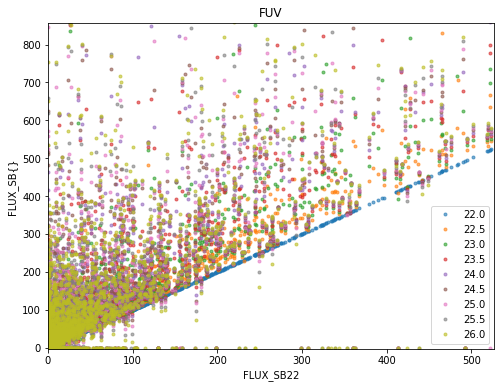

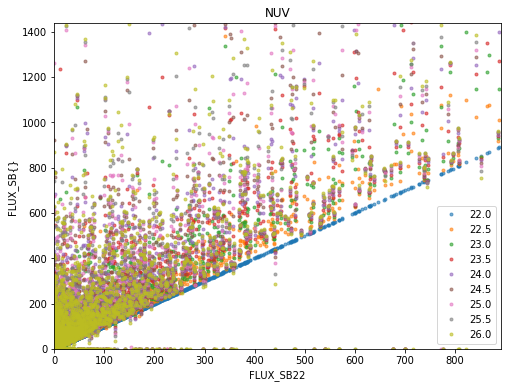

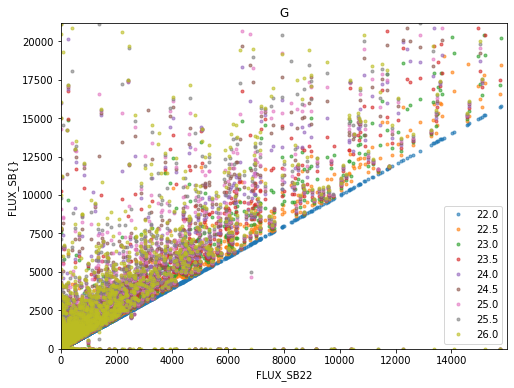

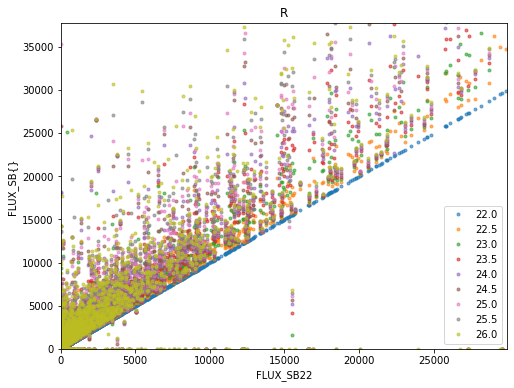

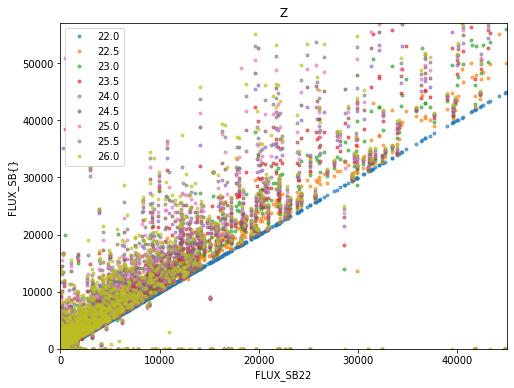

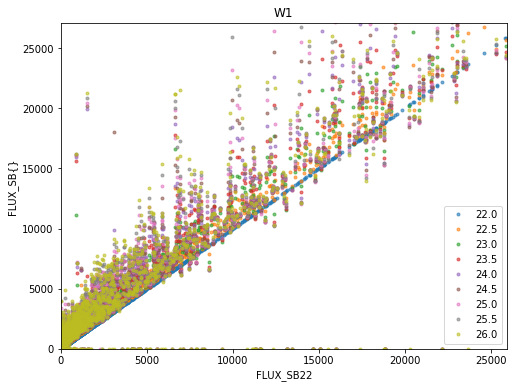

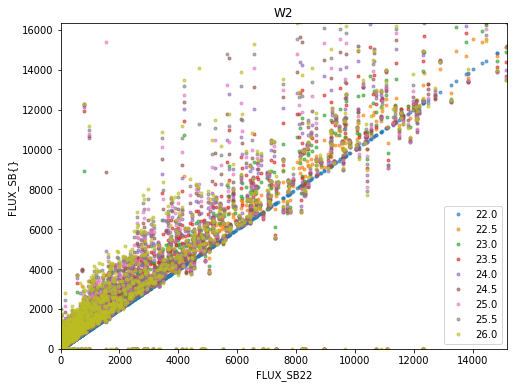

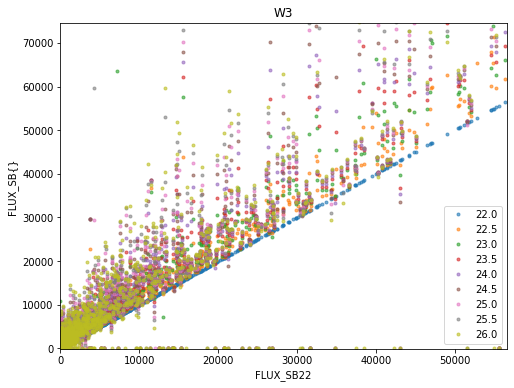

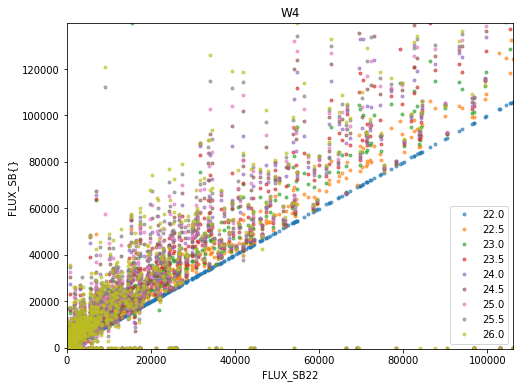

In [64]:

allax=[]
for i,filt in enumerate(filters):
    x = f'FLUX_SB22_{filt}'
    #plt.subplot(3,3,i+1)
    plt.figure(figsize=(8,6))
    for j,a in enumerate(aps):
        if a%1 == 0:
            y = 'FLUX_SB{:d}_{}'.format(int(a),filt)
        else:
            y = f'FLUX_SB{a}_{filt}'
        #print(a,x,y)
        plt.plot(ephot[x],ephot[y],'k.',label=f"{a}",c=mycolors[j],alpha=.6)
   
    allax.append(plt.gca())
    plt.title(filt)
    plt.legend()
    plt.xlabel('FLUX_SB22')
    plt.ylabel('FLUX_SB{}')
    #plt.gca().set_xscale('log')
    #plt.gca().set_yscale('log')
    plt.xlim(scoreatpercentile(ephot[x],2),scoreatpercentile(ephot[x],99))
    plt.ylim(scoreatpercentile(ephot[y],2),scoreatpercentile(ephot[y],99))
    #plt.ylim(-500,10000)

Text(0.5, 1.0, 'Elliptical Photometry from JM')

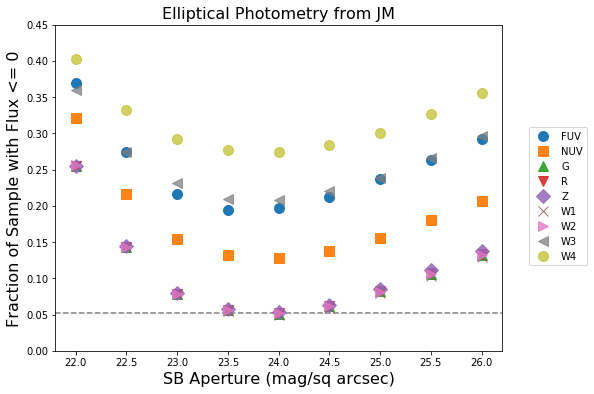

In [163]:
ntot = len(ephot)
plt.figure(figsize=(8,6))
markers = ['o','s','^', 'v','D','x','>','<','o']
sizes = np.arange(14,4,-1)
alphas = np.linspace(1,.7,9)
for i,filt in enumerate(filters):
    frac_zero=[]
    #plt.subplot(3,3,i+1)
    for a in aps:
        if a%1 == 0:
            y = 'FLUX_SB{:d}_{}'.format(int(a),filt)
        else:
            y = f'FLUX_SB{a}_{filt}'
        #print(y)
        frac_zero.append(np.sum(ephot[y] <= 0)/ntot)
    #if i%3 != 0:
    #    plt.yticks([],[])
    #if i < 6:
    #    plt.xticks([],[])
    if i ==3:
        plt.axhline(frac_zero[4],ls='--',c='0.5')
    plt.plot(aps,frac_zero,'bo',label=filt,c=mycolors[i],marker=markers[i],markersize=10,alpha=alphas[i])
    
plt.ylim(0,.45)

plt.legend(bbox_to_anchor = (1.05, 0.7))
plt.xlabel('SB Aperture (mag/sq arcsec)',fontsize=16)
plt.ylabel('Fraction of Sample with Flux <= 0',fontsize=16)
plt.title('Elliptical Photometry from JM',fontsize=16)

### Repeating for aperture fluxes

* I don't know what these are - emailed JM but didn't hear back

Text(0.5, 1.0, 'Elliptical Photometry from JM')

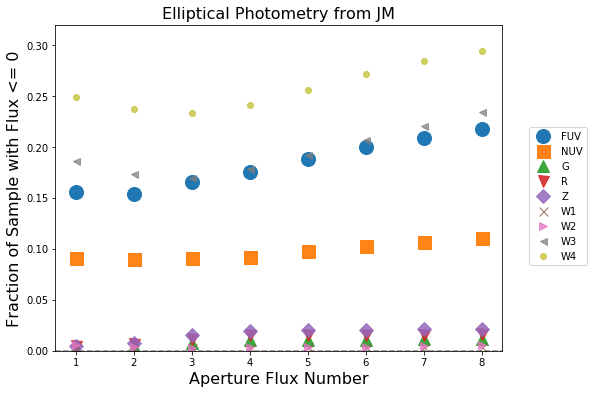

In [158]:
ntot = len(ephot)
plt.figure(figsize=(8,6))
markers = ['o','s','^', 'v','D','x','>','<','o']
sizes = np.arange(14,4,-1)
alphas = np.linspace(1,.7,9)
for i,filt in enumerate(filters):
    frac_zero=[]
    #plt.subplot(3,3,i+1)
    for a in apflux:
        y = 'FLUX_AP{:02d}_{}'.format(int(a),filt)
        #print(y)
        frac_zero.append(np.sum(ephot[y] <= 0)/ntot)
    #if i%3 != 0:
    #    plt.yticks([],[])
    #if i < 6:
    #    plt.xticks([],[])
    if i ==5:
        plt.axhline(0,ls='--',c='0.5')
    plt.plot(apflux,frac_zero,'bo',label=filt,c=mycolors[i],marker=markers[i],markersize=sizes[i],alpha=alphas[i])
    
plt.ylim(0,.32)

plt.legend(bbox_to_anchor = (1.05, 0.7))
plt.xlabel('Aperture Flux Number',fontsize=16)
plt.ylabel('Fraction of Sample with Flux <= 0',fontsize=16)
plt.title('Elliptical Photometry from JM',fontsize=16)

# calculate the fraction with all fluxes == 0 vs filter

Fraction of sample with all SB Fluxes <= 0
-------------------------------------------
FUV: 12.57%
NUV:  8.78%
G  :  0.52%
R  :  0.63%
Z  :  0.60%
W1 :  0.62%
W2 :  0.71%
W3 :  7.42%
W4 : 12.44%


Text(0.5, 1.0, 'Elliptical Photometry from JM')

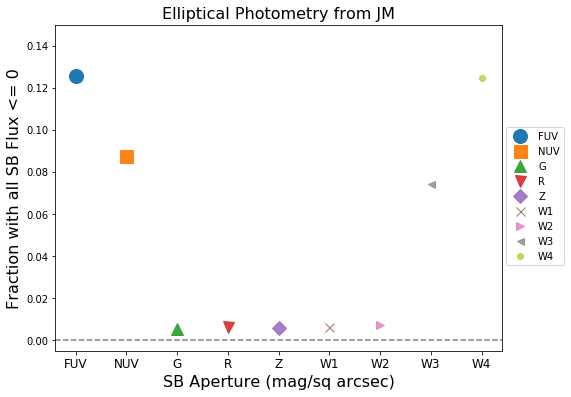

In [146]:
ntot = len(ephot)
plt.figure(figsize=(8,6))
markers = ['o','s','^', 'v','D','x','>','<','o']
sizes = np.arange(14,4,-1)
alphas = np.linspace(1,.7,9)
xvalues_plot = np.arange(len(filters))
print('Fraction of sample with all SB Fluxes <= 0')
print('-------------------------------------------')
for i,filt in enumerate(filters):
    frac_zero=[]
    #plt.subplot(3,3,i+1)
    for j,a in enumerate(aps):
        if a%1 == 0:
            y = 'FLUX_SB{:d}_{}'.format(int(a),filt)
        else:
            y = f'FLUX_SB{a}_{filt}'
        #print(y)
        if j == 0:
            zero_flag = (ephot[y] <= 0)
        else:
            zero_flag = zero_flag & (ephot[y] <= 0)
    frac_zero = np.sum(zero_flag)/ntot
    #if i ==3:
    #    
    plt.plot(i,frac_zero,'bo',label=filt,c=mycolors[i],marker=markers[i],markersize=sizes[i],alpha=alphas[i])
    print("{:3s}: {:5.2f}%".format(filt,100*frac_zero))
plt.ylim(-.005,.15)
plt.axhline(0,ls='--',c='0.5')
plt.xticks(xvalues_plot,filters,fontsize=12)
plt.legend(bbox_to_anchor = (1.15, 0.7))
plt.xlabel('SB Aperture (mag/sq arcsec)',fontsize=16)
plt.ylabel('Fraction with all SB Flux <= 0',fontsize=16)
plt.title('Elliptical Photometry from JM',fontsize=16)

### Repeat for Aperture Fluxes

Fraction of sample with all SB Fluxes <= 0
-------------------------------------------
FUV: 12.98%
NUV:  8.49%
G  :  0.16%
R  :  0.26%
Z  :  0.28%
W1 :  0.10%
W2 :  0.11%
W3 :  6.66%
W4 : 10.00%


Text(0.5, 1.0, 'Elliptical Photometry from JM')

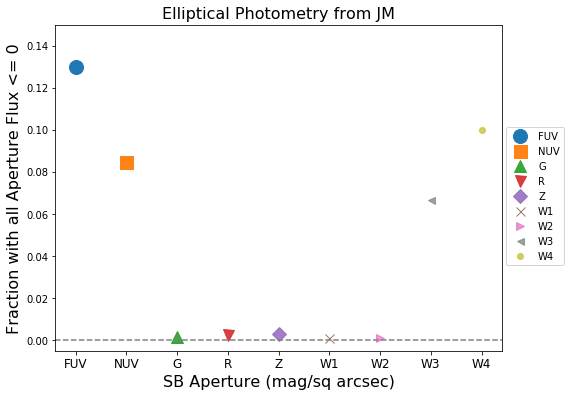

In [148]:
ntot = len(ephot)
plt.figure(figsize=(8,6))
markers = ['o','s','^', 'v','D','x','>','<','o']
sizes = np.arange(14,4,-1)
alphas = np.linspace(1,.7,9)
xvalues_plot = np.arange(len(filters))

print('Fraction of sample with all SB Fluxes <= 0')
print('-------------------------------------------')
for i,filt in enumerate(filters):
    frac_zero=[]
    #plt.subplot(3,3,i+1)
    for j,a in enumerate(apflux):
        y = 'FLUX_AP{:02d}_{}'.format(int(a),filt)
        
        if j == 0:
            zero_flag = (ephot[y] <= 0)
        else:
            zero_flag = zero_flag & (ephot[y] <= 0)
    frac_zero = np.sum(zero_flag)/ntot
    #if i ==3:
    #    
    plt.plot(i,frac_zero,'bo',label=filt,c=mycolors[i],marker=markers[i],markersize=sizes[i],alpha=alphas[i])
    print("{:3s}: {:5.2f}%".format(filt,100*frac_zero))
plt.ylim(-.005,.15)
plt.axhline(0,ls='--',c='0.5')
plt.xticks(xvalues_plot,filters,fontsize=12)
plt.legend(bbox_to_anchor = (1.15, 0.7))
plt.xlabel('SB Aperture (mag/sq arcsec)',fontsize=16)
plt.ylabel('Fraction with all Aperture Flux <= 0',fontsize=16)
plt.title('Elliptical Photometry from JM',fontsize=16)

# Summary: Notes and Best Procedure for Getting total flux

### Notes
* best SB mag to use is the SB24


### Best Procedure
* start with SB24 flux
* scale to total flux using COG mag if available
  * calculate the scale from the r-band fluxes
  * use the same scale for all filters
  
$$ total \ flux = FLUX\_SB24\_R \times \frac{COG \ FLUX}{FLUX\_SB24\_R}  $$

* If SB24 is not available:
  * look for SB{23.5,24.5, 23,25}
  * but then need to switch for all filters
  
* If COG mag is not available:
  * find first available of SB{26, 25.5, 25, 24.5} to use as the proxy for total flux
  * log which flux is used as total
  * if none of those are available, use a scale factor of 1


  

In [66]:
# using sb of 24 mag/sq arcsec

%run ~/github/virgoseds/python/legacy2magphys.py --sbmag 24

number of galaxies with SB24_R == 0 is 767


/home/rfinn/github/virgoseds/python/legacy2magphys.py:191: RuntimeWarning: divide by zero encountered in true_divide
  



total number with no valid R-band flux as input = 34



/home/rfinn/github/virgoseds/python/legacy2magphys.py:231: RuntimeWarning: divide by zero encountered in log10
  # don't reset rmag_tot - this will yield ridiculously high stellar masses


/home/rfinn/github/virgoseds/python/legacy2magphys.py:243: RuntimeWarning: divide by zero encountered in true_divide
  scaled_flux_Jy[i] = flux_Jy[i]*scale_factor[i]
/home/rfinn/github/virgoseds/python/legacy2magphys.py:243: RuntimeWarning: invalid value encountered in true_divide
  scaled_flux_Jy[i] = flux_Jy[i]*scale_factor[i]


In [67]:
#!grep nan ~/research/Virgo/legacy-phot/magphysInputS.dat 
!grep nan ~/research/Virgo/legacy-phot/magphysInputS.dat | wc -l

0


In [68]:
#!grep nan ~/research/Virgo/legacy-phot/magphysInputN.dat 
!grep nan ~/research/Virgo/legacy-phot/magphysInputN.dat  | wc -l

0


In [71]:
i=67
print(flux_tot[i],scale_factor[i],np.min(scale_factor),np.max(scale_factor))

395.96927 1.0 1.0 2051304.7989001581


In [80]:
flag = scale_factor > 1000
ephot[flag]

VF_ID,GALAXY,X0_MOMENT,Y0_MOMENT,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,PA_MOMENT,BA_MOMENT,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,SMA_IVAR_SB22,SMA_IVAR_SB22.5,SMA_IVAR_SB23,SMA_IVAR_SB23.5,SMA_IVAR_SB24,SMA_IVAR_SB24.5,SMA_IVAR_SB25,SMA_IVAR_SB25.5,SMA_IVAR_SB26,FLUX_SB22_G,FLUX_SB22.5_G,FLUX_SB23_G,FLUX_SB23.5_G,FLUX_SB24_G,FLUX_SB24.5_G,FLUX_SB25_G,FLUX_SB25.5_G,FLUX_SB26_G,FLUX_IVAR_SB22_G,FLUX_IVAR_SB22.5_G,FLUX_IVAR_SB23_G,FLUX_IVAR_SB23.5_G,FLUX_IVAR_SB24_G,FLUX_IVAR_SB24.5_G,FLUX_IVAR_SB25_G,FLUX_IVAR_SB25.5_G,FLUX_IVAR_SB26_G,FLUX_SB22_R,FLUX_SB22.5_R,FLUX_SB23_R,FLUX_SB23.5_R,FLUX_SB24_R,FLUX_SB24.5_R,FLUX_SB25_R,FLUX_SB25.5_R,FLUX_SB26_R,FLUX_IVAR_SB22_R,FLUX_IVAR_SB22.5_R,FLUX_IVAR_SB23_R,FLUX_IVAR_SB23.5_R,FLUX_IVAR_SB24_R,FLUX_IVAR_SB24.5_R,FLUX_IVAR_SB25_R,FLUX_IVAR_SB25.5_R,FLUX_IVAR_SB26_R,FLUX_SB22_Z,FLUX_SB22.5_Z,FLUX_SB23_Z,FLUX_SB23.5_Z,FLUX_SB24_Z,FLUX_SB24.5_Z,FLUX_SB25_Z,FLUX_SB25.5_Z,FLUX_SB26_Z,FLUX_IVAR_SB22_Z,FLUX_IVAR_SB22.5_Z,FLUX_IVAR_SB23_Z,FLUX_IVAR_SB23.5_Z,FLUX_IVAR_SB24_Z,FLUX_IVAR_SB24.5_Z,FLUX_IVAR_SB25_Z,FLUX_IVAR_SB25.5_Z,FLUX_IVAR_SB26_Z,FLUX_SB22_FUV,FLUX_SB22.5_FUV,FLUX_SB23_FUV,FLUX_SB23.5_FUV,FLUX_SB24_FUV,FLUX_SB24.5_FUV,FLUX_SB25_FUV,FLUX_SB25.5_FUV,FLUX_SB26_FUV,FLUX_IVAR_SB22_FUV,FLUX_IVAR_SB22.5_FUV,FLUX_IVAR_SB23_FUV,FLUX_IVAR_SB23.5_FUV,FLUX_IVAR_SB24_FUV,FLUX_IVAR_SB24.5_FUV,FLUX_IVAR_SB25_FUV,FLUX_IVAR_SB25.5_FUV,FLUX_IVAR_SB26_FUV,FLUX_SB22_NUV,FLUX_SB22.5_NUV,FLUX_SB23_NUV,FLUX_SB23.5_NUV,FLUX_SB24_NUV,FLUX_SB24.5_NUV,FLUX_SB25_NUV,FLUX_SB25.5_NUV,FLUX_SB26_NUV,FLUX_IVAR_SB22_NUV,FLUX_IVAR_SB22.5_NUV,FLUX_IVAR_SB23_NUV,FLUX_IVAR_SB23.5_NUV,FLUX_IVAR_SB24_NUV,FLUX_IVAR_SB24.5_NUV,FLUX_IVAR_SB25_NUV,FLUX_IVAR_SB25.5_NUV,FLUX_IVAR_SB26_NUV,FLUX_SB22_W1,FLUX_SB22.5_W1,FLUX_SB23_W1,FLUX_SB23.5_W1,FLUX_SB24_W1,FLUX_SB24.5_W1,FLUX_SB25_W1,FLUX_SB25.5_W1,FLUX_SB26_W1,FLUX_IVAR_SB22_W1,FLUX_IVAR_SB22.5_W1,FLUX_IVAR_SB23_W1,FLUX_IVAR_SB23.5_W1,FLUX_IVAR_SB24_W1,FLUX_IVAR_SB24.5_W1,FLUX_IVAR_SB25_W1,FLUX_IVAR_SB25.5_W1,FLUX_IVAR_SB26_W1,FLUX_SB22_W2,FLUX_SB22.5_W2,FLUX_SB23_W2,FLUX_SB23.5_W2,FLUX_SB24_W2,FLUX_SB24.5_W2,FLUX_SB25_W2,FLUX_SB25.5_W2,FLUX_SB26_W2,FLUX_IVAR_SB22_W2,FLUX_IVAR_SB22.5_W2,FLUX_IVAR_SB23_W2,FLUX_IVAR_SB23.5_W2,FLUX_IVAR_SB24_W2,FLUX_IVAR_SB24.5_W2,FLUX_IVAR_SB25_W2,FLUX_IVAR_SB25.5_W2,FLUX_IVAR_SB26_W2,FLUX_SB22_W3,FLUX_SB22.5_W3,FLUX_SB23_W3,FLUX_SB23.5_W3,FLUX_SB24_W3,FLUX_SB24.5_W3,FLUX_SB25_W3,FLUX_SB25.5_W3,FLUX_SB26_W3,FLUX_IVAR_SB22_W3,FLUX_IVAR_SB22.5_W3,FLUX_IVAR_SB23_W3,FLUX_IVAR_SB23.5_W3,FLUX_IVAR_SB24_W3,FLUX_IVAR_SB24.5_W3,FLUX_IVAR_SB25_W3,FLUX_IVAR_SB25.5_W3,FLUX_IVAR_SB26_W3,FLUX_SB22_W4,FLUX_SB22.5_W4,FLUX_SB23_W4,FLUX_SB23.5_W4,FLUX_SB24_W4,FLUX_SB24.5_W4,FLUX_SB25_W4,FLUX_SB25.5_W4,FLUX_SB26_W4,FLUX_IVAR_SB22_W4,FLUX_IVAR_SB22.5_W4,FLUX_IVAR_SB23_W4,FLUX_IVAR_SB23.5_W4,FLUX_IVAR_SB24_W4,FLUX_IVAR_SB24.5_W4,FLUX_IVAR_SB25_W4,FLUX_IVAR_SB25.5_W4,FLUX_IVAR_SB26_W4,SMA_AP01,SMA_AP02,SMA_AP03,SMA_AP04,SMA_AP05,SMA_AP06,SMA_AP07,SMA_AP08,FLUX_AP01_G,FLUX_AP02_G,FLUX_AP03_G,FLUX_AP04_G,FLUX_AP05_G,FLUX_AP06_G,FLUX_AP07_G,FLUX_AP08_G,FLUX_IVAR_AP01_G,FLUX_IVAR_AP02_G,FLUX_IVAR_AP03_G,FLUX_IVAR_AP04_G,FLUX_IVAR_AP05_G,FLUX_IVAR_AP06_G,FLUX_IVAR_AP07_G,FLUX_IVAR_AP08_G,FLUX_AP01_R,FLUX_AP02_R,FLUX_AP03_R,FLUX_AP04_R,FLUX_AP05_R,FLUX_AP06_R,FLUX_AP07_R,FLUX_AP08_R,FLUX_IVAR_AP01_R,FLUX_IVAR_AP02_R,FLUX_IVAR_AP03_R,FLUX_IVAR_AP04_R,FLUX_IVAR_AP05_R,FLUX_IVAR_AP06_R,FLUX_IVAR_AP07_R,FLUX_IVAR_AP08_R,FLUX_AP01_Z,FLUX_AP02_Z,FLUX_AP03_Z,FLUX_AP04_Z,FLUX_AP05_Z,FLUX_AP06_Z,FLUX_AP07_Z,FLUX_AP08_Z,FLUX_IVAR_AP01_Z,FLUX_IVAR_AP02_Z,FLUX_IVAR_AP03_Z,FLUX_IVAR_AP04_Z,FLUX_IVAR_AP05_Z,FLUX_IVAR_AP06_Z,FLUX_IVAR_AP07_Z,FLUX_IVAR_AP08_Z,FLUX_AP01_FUV,FLUX_AP02_FUV,FLUX_AP03_FUV,FLUX_AP04_FUV,FLUX_AP05_FUV,FLUX_AP06_FUV,FLUX_AP07_FUV,FLUX_AP08_FUV,FLUX_IVAR_AP01_FUV,FLUX_IVAR_AP02_FUV,FLUX_IVAR_AP03_FUV,FLUX_IVAR_AP04_FUV,FLUX_IVAR_AP05_FUV,FLUX_IVAR_AP06_FUV,FLUX_IVAR_AP07_FUV,FLUX_IVAR_AP08_FUV,FLUX_AP01_NUV,FLUX_AP02

In [84]:
np.array(input_sb)[flag]

array(['24.5', '24', '24', '24.5', '24', '24', '24', '24', '24.5', '24',
       '24.5', '23.5', '25', '24', '25.5', '24', '24', '24', '24', '24.5',
       '24', '24.5', '24.5', '25', '24', '24.5', '24.5', '25.5', '25',
       '25', '24', '25.5', '24', '24', '24', '25', '25', '24', '25', '24',
       '25', '24', '24', '25', '24.5', '24', '24'], dtype='<U32')

In [85]:
np.array(total_flux_column)[flag]

array(['COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R',
       'COG_MTOT_R', 'COG_MTOT_R', 'COG_MTOT_R'], dtype='<U13')

In [89]:
flux_Jy[flag][:,4]

array([ 4.05737945e-08,  6.90171191e-08,  6.41265433e-06,  1.49834823e-07,
        8.52401899e-06, -9.35790112e-08,  9.17769867e-05,  1.04416685e-07,
        1.01800949e-07,  8.14166981e-07,  2.70802898e-07,  3.44193597e-07,
        2.14311854e-09,  2.70761939e-05,  5.77430009e-08,  2.40878144e-05,
        5.96040877e-07,  2.22544401e-07, -1.03918241e-09,  4.44513793e-05,
        2.07712355e-06,  1.81618650e-07,  1.78994774e-06,  8.99114069e-08,
        3.99561911e-10,  5.88850864e-08,  1.44970266e-05, -4.17493953e-08,
        2.61079498e-06,  1.50418228e-06,  2.48173683e-06,  8.03351383e-07,
        2.29815851e-05,  9.98250357e-07,  1.93233944e-07,  8.51370561e-07,
        5.10780264e-06,  2.65334597e-06,  1.05759386e-07,  2.16189150e-07,
        8.45247237e-08,  1.24126545e-05,  3.07209848e-04,  7.53654428e-07,
        8.05494905e-07,  7.08852838e-07,  9.54088023e-07])

Text(0.5, 0, 'log10(scale_factor)')

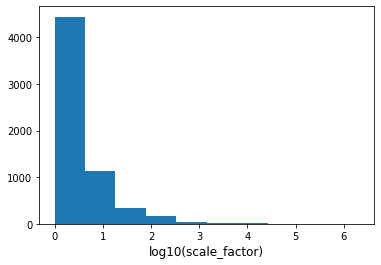

In [77]:
plt.figure()
plt.hist(np.log10(scale_factor))
plt.xlabel('log10(scale_factor)',fontsize=12)

# Converting John's output to magphys input

In [5]:
# using sb of 22 mag/sq arcsec

%run ~/github/virgoseds/python/legacy2magphys.py --sbmag 24

COG_MTOT_R = -1 for NGC3348 but found FLUX_SB26_R 49286.78515625
COG_MTOT_R = -1 for NGC2273B but found FLUX_SB26_R 74048.2109375
COG_MTOT_R = -1 for PGC2581064 but found FLUX_SB26_R 238.4237518310547
COG_MTOT_R = -1 for IC0694 but found FLUX_SB26_R -8165.50048828125


/home/rfinn/github/virgoseds/python/legacy2magphys.py:166: RuntimeWarning: invalid value encountered in log10
  rmag_tot[i] = 22.5 - 2.5*np.log10(ephot[scaling_col][i])


COG_MTOT_R = -1 for NGC5473 but found FLUX_SB26_R 28758.529296875
COG_MTOT_R = -1 for UGC06773 but found FLUX_SB26_R 125495.46875
COG_MTOT_R = -1 for NGC5795 but found FLUX_SB26_R 5804.775390625
COG_MTOT_R = -1 for SDSSJ130450.58+490709.8 but found FLUX_SB26_R -1195.2650146484375
COG_MTOT_R = -1 for WSRT-CVN13 but found FLUX_SB26_R 14272.9990234375
COG_MTOT_R = -1 for NGC3430 but found FLUX_SB26_R 28789.6328125
COG_MTOT_R = -1 for NGC6389 but found FLUX_SB26_R -2169.26318359375
COG_MTOT_R = -1 for NGC3230 but found FLUX_SB26_R 6821.34375
COG_MTOT_R = -1 for NGC4417 but found FLUX_SB23_R
COG_MTOT_R = -1 for NGC4492 but found FLUX_SB26_R -1293.864013671875
COG_MTOT_R = -1 for AGC208394 but found FLUX_SB26_R -3147.43310546875
COG_MTOT_R = -1 for NGC3018 but found FLUX_SB26_R 14908.578125


/home/rfinn/github/virgoseds/python/legacy2magphys.py:170: RuntimeWarning: divide by zero encountered in true_divide
  scale_factor = flux_tot_Jy/flux_Jy[:,3]
/home/rfinn/github/virgoseds/python/legacy2magphys.py:176: RuntimeWarning: invalid value encountered in multiply
  scaled_flux_Jy[i] = flux_Jy[i]*scale_factor[i]


# moving files to grawp and rerunning with extcorr

* started job at 12:10 pm

* 3385 done at 14:19

* seems to send 1040 jobs at once

* 4424 at 14:48

* finished at 15:27!

In [ ]:
os.system('scp /home/rfinn/research/Virgo/legacy-phot/magphysInput?.dat grawp:research/Virgo/magphysParallel/.')

In [10]:
(2*60+9)/3385*6000/60

3.810930576070901

In [11]:
(2*60+38)/4424*6000/60

3.571428571428571

In [12]:
(3*60+17)/5668

0.03475652787579393

In [13]:
3+17/60

3.283333333333333